In [ ]:
!pip install underthesea
!pip install gensim
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 17.4 MB/s 
     |████████████████████████████████| 235 kB 65.4 MB/s 
     |████████████████████████████████| 581 kB 51.7 MB/s 
     |████████████████████████████████| 965 kB 66.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 5.5 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3142812 sha256=8357eaca1a08e6e439c02acd6acb3566ce37c21c9dcf24c1a9f5f1c2f7bd0af6
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import re
import gzip
import keras
import fasttext
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from underthesea import word_tokenize
from gensim.utils import simple_preprocess
from gensim.models.wrappers import FastText
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Embedding 
from keras.layers import LSTM 
from keras.layers.wrappers import Bidirectional
from keras.layers import SimpleRNN, Dense, Lambda, dot, Activation, concatenate, Embedding, LSTM, Dropout
from sklearn.utils import shuffle




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# train_path = "/content/drive/MyDrive/Google_Colab/NLP/NLP/TextClassifiation/train.csv"
# test_path = "/content/drive/MyDrive/Google_Colab/NLP/NLP/TextClassifiation/test.csv"
stop_word='/content/drive/MyDrive/NLP_NNTuNhien/btl/vietnamese-stopwords.txt'
path_data = '/content/drive/MyDrive/NLP_NNTuNhien/DL_PhanLoaiComment/Nam4_hk2/dataset_28600.xlsx'
# fasttext_model_path = "/content/drive/MyDrive/Google_Colab/NLP/LSTM-Attention-VN/cc.vi.300.bin"

In [ ]:
dataset = pd.read_excel(path_data)

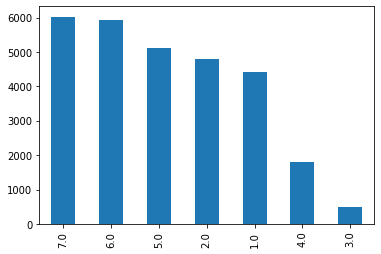

In [ ]:
dataset["Label"].value_counts().plot.bar()

In [ ]:
dataset.head(10)

,Comment,Label
0,gọi sâu tằm trứng muối somtam trứng muối món...,1.0
1,trời lạnh người ho uống đá v đi học tạt ngang...,1.0
2,quán quen thèm bingsu quán khai trương thất ...,1.0
3,review ecstacy làmgia đình thất vọng hi vọng...,1.0
4,đầu uống trà sữa đồ uống ổn không gian đẹp t...,1.0
5,so sánh quán ngang ngửa gongcha phẫn nộ nhâ...,1.0
6,hôm e gái bé đi đi vòng vin nguyễn chí đói đó...,1.0
7,quán mở cửa ơn giời quán quán hơi thoải mái ...,1.0
8,món nướng tạm đặc sắc nổi trội nhân viên ph...,1.0
9,không gian quán tầng tầng máy lạnh tầng tần...,1.0


In [ ]:
#Trộn data
dataset = shuffle(dataset)

In [ ]:
import string  
def clean_text(text): 
    text = text.translate(string.punctuation)
    # xóa các ký tự không cần thiết
    text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',str(text))
    text = text.lower().split()
    text = " ".join(text)
    return text

In [ ]:
dataset_clean = dataset['Comment'].map(lambda x: clean_text(x))

In [ ]:
stopwords = pd.read_csv(stop_word)
def word_processing(sentence):
  sentence = " ".join(simple_preprocess(sentence))
  sentence = [word for word in word_tokenize(sentence.lower(), format="text").split() if word not in stopwords]
  return [word for word in sentence if word != ""]

In [ ]:
input_sentences = [word_processing(str(sentence)) for sentence in dataset_clean.values.tolist()]

In [ ]:
input_sentences[:10]

[['flat',
  'white',
  'lạ',
  'latte',
  'espresso',
  'đậm',
  'lắm',
  'sữa',
  'latte',
  'khẩu_vị',
  'hình_như',
  'hà_nội',
  'quán',
  'phục_vụ',
  'coffee',
  'kiểu',
  'úc'],
 ['quán',
  'cháo',
  'vụ',
  'lùm',
  'xùm',
  'mạng',
  'cướp',
  'chỗ',
  'chửi',
  'đuổi',
  'người_ta',
  'làm_ăn',
  'gia_đình',
  'người_ta',
  'ship'],
 ['order',
  'tụi',
  'thân_thiện',
  'nhân_viên',
  'phục_vụ',
  'nhân_viên',
  'dọn',
  'toàn',
  'bát_đĩa',
  'nhựa',
  'toàn',
  'kiểu',
  'quăng',
  'mạnh_tay',
  'xô',
  'vui_mắt',
  'phết'],
 ['tiền', 'cốc', 'nen', 'cốc', 'rẻ', 'độ', 'sốtruột', 'suy_nghĩ', 'ko'],
 ['nhân_viên',
  'nhiệt_tình',
  'mặc_dù',
  'đên',
  'tối',
  'muộn',
  'nhân_viên',
  'mệt',
  'phục_vụ',
  'nhanh_chóng',
  'thân_thiện',
  'đồ',
  'ướp',
  'khẩu_vị',
  'đồ',
  'bình_thường'],
 ['không_gian', 'sang_trọng', 'nằm', 'cạnh', 'crescent', 'tuyệt'],
 ['review', 'hình', 'kịp', 'up', 'lẩu', 'cá_đuối', 'ngon'],
 ['ding',
  'tea',
  'trần',
  'hưng',
  'đẹp',
  'không_gia

In [ ]:
len(input_sentences)

28594

In [ ]:
word2id = dict()
max_words = 0
for sentence in input_sentences:
    for word in sentence:
       
        if word not in word2id:
            word2id[word] = len(word2id)
 
    if len(sentence) > max_words:
        max_words = len(sentence)


id2word = {v: k for k, v in word2id.items()}

In [ ]:
word2id.items()

dict_items([('flat', 0), ('white', 1), ('lạ', 2), ('latte', 3), ('espresso', 4), ('đậm', 5), ('lắm', 6), ('sữa', 7), ('khẩu_vị', 8), ('hình_như', 9), ('hà_nội', 10), ('quán', 11), ('phục_vụ', 12), ('coffee', 13), ('kiểu', 14), ('úc', 15), ('cháo', 16), ('vụ', 17), ('lùm', 18), ('xùm', 19), ('mạng', 20), ('cướp', 21), ('chỗ', 22), ('chửi', 23), ('đuổi', 24), ('người_ta', 25), ('làm_ăn', 26), ('gia_đình', 27), ('ship', 28), ('order', 29), ('tụi', 30), ('thân_thiện', 31), ('nhân_viên', 32), ('dọn', 33), ('toàn', 34), ('bát_đĩa', 35), ('nhựa', 36), ('quăng', 37), ('mạnh_tay', 38), ('xô', 39), ('vui_mắt', 40), ('phết', 41), ('tiền', 42), ('cốc', 43), ('nen', 44), ('rẻ', 45), ('độ', 46), ('sốtruột', 47), ('suy_nghĩ', 48), ('ko', 49), ('nhiệt_tình', 50), ('mặc_dù', 51), ('đên', 52), ('tối', 53), ('muộn', 54), ('mệt', 55), ('nhanh_chóng', 56), ('đồ', 57), ('ướp', 58), ('bình_thường', 59), ('không_gian', 60), ('sang_trọng', 61), ('nằm', 62), ('cạnh', 63), ('crescent', 64), ('tuyệt', 65), ('revi

In [ ]:
print(max_words)
print(len(word2id))
print(len(id2word))

295
20805
20805


In [ ]:
X = [[word2id[word] for word in sentence] for sentence in input_sentences]
X = sequence.pad_sequences(X, max_words)
Y = dataset['Label']
le = LabelEncoder()
Y = le.fit_transform(Y)

Y_train = to_categorical(Y, num_classes=7)

In [ ]:
print(X.shape)
print(Y.shape)

(28594, 295)
(28594,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_train, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
print(X[2])
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 27 28 29
 30 31 32 33 34 35 36]
(17156, 295)
(5719, 295)
(5719, 295)


In [ ]:
vocab_size = len(word2id)
embedding_dim = 300
input_length=max_words

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size+1, embedding_dim, input_length=max_length))
model2.add(Bidirectional(LSTM(64)))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(7, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 295, 300)          6241800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              186880    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                      

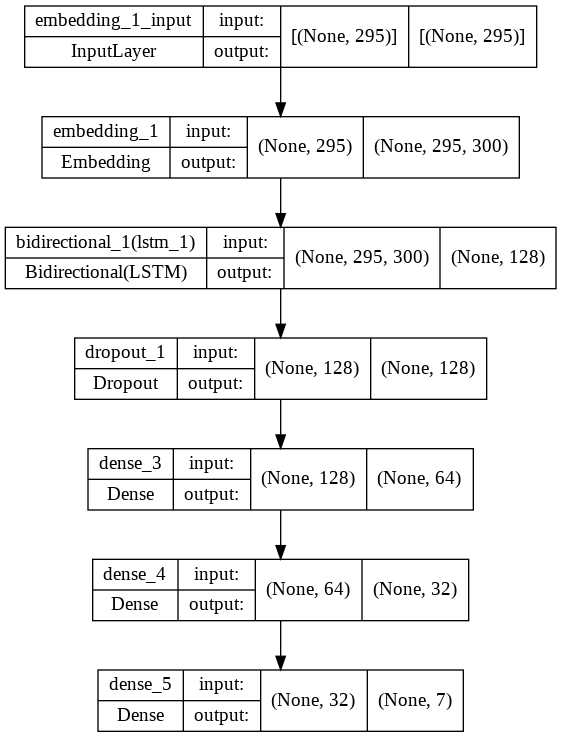

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='/content/drive/MyDrive/NLP_NNTuNhien/DL_PhanLoaiComment/Nam4_hk2/model2NLP.png', show_shapes=True, show_layer_names=True)

In [ ]:
model2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['acc'])
history = model2.fit(X_train, y_train ,validation_split=0.15,validation_data = (X_val, y_val), epochs=10)

Epoch 1/10
456/456 [==============================] - 20s 35ms/step - loss: 0.6969 - acc: 0.7271 - val_loss: 0.1843 - val_acc: 0.9545
Epoch 2/10
456/456 [==============================] - 16s 35ms/step - loss: 0.0811 - acc: 0.9783 - val_loss: 0.1026 - val_acc: 0.9747
Epoch 3/10
456/456 [==============================] - 15s 32ms/step - loss: 0.0350 - acc: 0.9914 - val_loss: 0.0748 - val_acc: 0.9856
Epoch 4/10
456/456 [==============================] - 14s 31ms/step - loss: 0.0128 - acc: 0.9974 - val_loss: 0.0983 - val_acc: 0.9852
Epoch 5/10
456/456 [==============================] - 17s 38ms/step - loss: 0.0213 - acc: 0.9961 - val_loss: 0.0880 - val_acc: 0.9860
Epoch 6/10
456/456 [==============================] - 13s 29ms/step - loss: 0.0142 - acc: 0.9963 - val_loss: 0.0884 - val_acc: 0.9825
Epoch 7/10
456/456 [==============================] - 15s 33ms/step - loss: 0.0076 - acc: 0.9982 - val_loss: 0.0925 - val_acc: 0.9880
Epoch 8/10
456/456 [==============================] - 13s 29ms

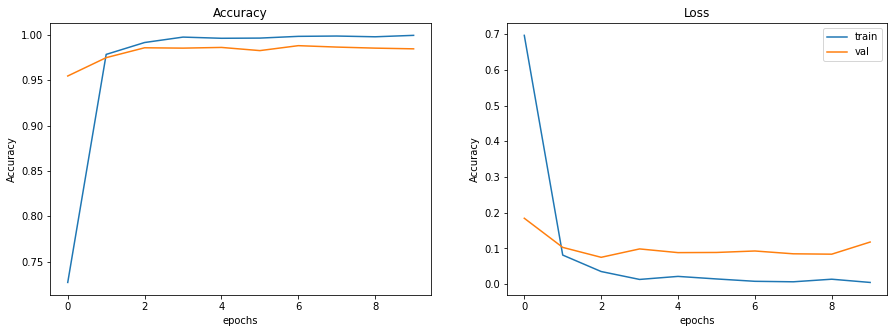

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# plt.figure(figsize=(20,10))
axs[0].set_title('Accuracy')
axs[0].plot(history.history['acc'],label='train')
axs[0].plot(history.history['val_acc'], label='val')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('Accuracy')

axs[1].set_title('Loss')
axs[1].plot(history.history['loss'],label='train')
axs[1].plot(history.history['val_loss'], label='val')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('Accuracy')

plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

179/179 - 3s - loss: 0.1040 - acc: 0.9851 - 3s/epoch - 16ms/step
0.9851372838020325


In [ ]:
model2.save('/content/drive/MyDrive/NLP_NNTuNhien/DL_PhanLoaiComment/Nam4_hk2/my_model.h5')

In [ ]:

className = {
        1:'phục vụ tệ',
        2:'món ăn tệ',
        3:'không hợp vệ sinh',
        4:'hợp vệ sinh',
        5:'phục vụ tốt',
        6:'món ăn ngon',
        7:'khác'
      }

In [ ]:
text = "Nhà hàng bẩn"
tokenized_sample = word_processing(text)
encoded_samples = [[word2id[word.lower()] for word in tokenized_sample]]
encoded_sample = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)
label = model2.predict(np.array(encoded_sample))
pre = np.argmax(label)
pre

2

In [ ]:
tokenized_sample

['nhà_hàng', 'bẩn']

In [ ]:
print(className[pre])

món ăn tệ


#SimpleRNN

In [ ]:
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_length=max_length))
model1.add(SimpleRNN(64))
model1.add(Dense(64, activation='relu'))

model1.add(Dense(32, activation="relu"))
model1.add(Dense(7, activation="softmax"))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 295, 300)          6241800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              186880    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                      

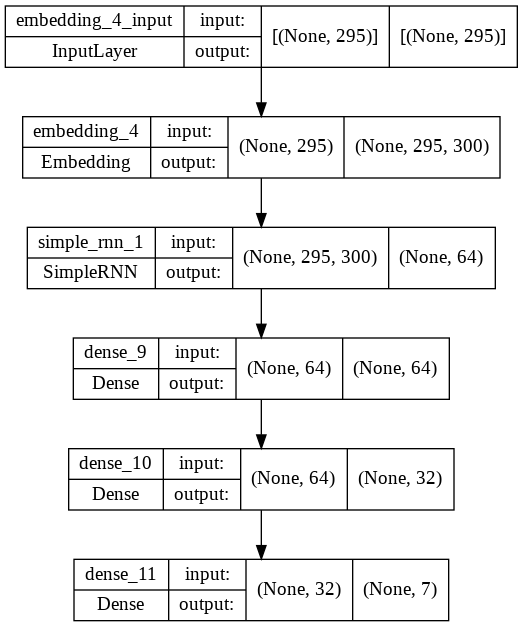

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='/content/drive/MyDrive/NLP_NNTuNhien/DL_PhanLoaiComment/Nam4_hk2/model1NLP.png', show_shapes=True, show_layer_names=True)

In [ ]:
model1.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['acc'])
history1 = model1.fit(X_train, y_train ,validation_split=0.15, epochs=10,validation_data = (X_val, y_val))

Epoch 1/10
456/456 [==============================] - 149s 322ms/step - loss: 0.8422 - acc: 0.6638 - val_loss: 0.6099 - val_acc: 0.7813
Epoch 2/10
456/456 [==============================] - 130s 286ms/step - loss: 0.2776 - acc: 0.9196 - val_loss: 0.2011 - val_acc: 0.9448
Epoch 3/10
456/456 [==============================] - 128s 280ms/step - loss: 0.2113 - acc: 0.9479 - val_loss: 0.2452 - val_acc: 0.9281
Epoch 4/10
456/456 [==============================] - 124s 271ms/step - loss: 0.4934 - acc: 0.8338 - val_loss: 0.4288 - val_acc: 0.8430
Epoch 5/10
456/456 [==============================] - 125s 274ms/step - loss: 0.2606 - acc: 0.9130 - val_loss: 0.3555 - val_acc: 0.8753
Epoch 6/10
456/456 [==============================] - 124s 272ms/step - loss: 0.1854 - acc: 0.9405 - val_loss: 0.2998 - val_acc: 0.9029
Epoch 7/10
456/456 [==============================] - 124s 272ms/step - loss: 0.1022 - acc: 0.9695 - val_loss: 0.2191 - val_acc: 0.9487
Epoch 8/10
456/456 [============================

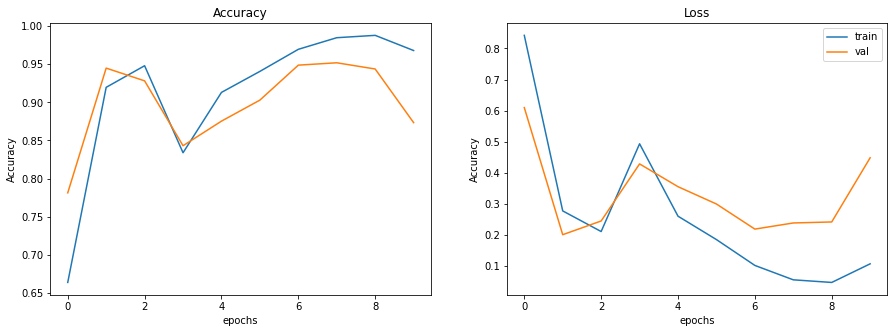

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# plt.figure(figsize=(20,10))
axs[0].set_title('Accuracy')
axs[0].plot(history1.history['acc'],label='train')
axs[0].plot(history1.history['val_acc'], label='val')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('Accuracy')

axs[1].set_title('Loss')
axs[1].plot(history1.history['loss'],label='train')
axs[1].plot(history1.history['val_loss'], label='val')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('Accuracy')

plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model1.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

179/179 - 4s - loss: 0.4339 - acc: 0.8767 - 4s/epoch - 22ms/step
0.8767266869544983


In [ ]:
model1.save('/content/drive/MyDrive/NLP_NNTuNhien/DL_PhanLoaiComment/Nam4_hk2/my_model.h5')

In [ ]:

className = {
        1:'phục vụ tệ',
        2:'món ăn tệ',
        3:'không hợp vệ sinh',
        4:'hợp vệ sinh',
        5:'phục vụ tốt',
        6:'món ăn ngon',
        7:'khác'
      }

In [ ]:
text = "Nhà hàng bẩn quá"
tokenized_sample = word_processing(text)
encoded_samples = [[word2id[word.lower()] for word in tokenized_sample]]
encoded_samples = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)
label = model2.predict(np.array(encoded_samples))
pre = np.argmax(label)
pre

2

In [ ]:
print(className[pre])

món ăn tệ
